<a href="https://colab.research.google.com/github/luisantoniourbanaviles/Simulacion-II/blob/main/proyecto/proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto simulacion: Diseño de Experimentos




Muchas veces la investigación se ve limitada por los costos de la experimentación, los materiales, procedimientos y pruebas pueden ser muy costosos y/o tomar demasiado tiempo, razón por la cual surge la necesidad de realizar un diseño de experimentos.

Con este procedimiento se busca modelar de forma sencilla un experimento a partir de sus parámetros, relacionando su efecto respecto a la variable de respuesta.

### Experimentacion


El experimento de nuestro interés busca obtener la respuesta de determinada cantidad de partículas de plata dentro de un nanocomposito generado con un proceso químico, para el diseño que realizaremos solo utilizaremos la última parte del proceso que conociste en

    1. Mezcla de materiales
    2. Agregar precursor de plata
    3. Calcinar
    4. Obtener el nanocomposito

Por indicaciones de la coordinadora de la investigación solo nos interesa la cantidad de precursor agregado y las características de la calcinación, es decir, el tiempo y la temperatura a la que ha se realizó esté procedimiento. Por está razón realizaremos  experimentos. La distribución de los niveles según los factores está dada por:

|**Nivel**|**Precursor**|**Temperatura**| **Tiempo** |
|-------------|------|------|----|
|-1|0.05|180|14 h|
|1|0.07|200|19 h|

Se requiere realizar todas las combinaciones de los parámetros para determinar su comportamiento, con la finalidad de reducir la varianza se realizan grupos de experimentos llamados replicas y los resultados de los experimentos son:

|**Experimento**|**Precursor**|**Temperatura**| **Tiempo** |||**Replicas**|
|-------------|------|------|----|--|-|-|
|1|-1|-1|-1|1.49|1.46|1.58|
|2|-1|-1|1|1.42|1.46|1.51|
|3|-1|1|-1|1.54|1.43|1.52|
|4|-1|1|1|1.58|1.47|1.51|
|5| 1|-1|-1|1.47|1.41|1.54|
|6| 1|-1|1|1.44|1.48|1.55|
|7| 1|1|-1|1.51|1.50|1.54|
|8| 1|1|1|1.48|1.52|1.47|

###Diseño de experimentos

No se que poner aqui

Modelo matematico

$$y_1 = μ + β_1P + β_2T + β_3t + β_4PT + β_5Pt + β_6Tt + β_7PTt$$

Para aproximar el modelo, se aplicara el algoritmo de Yates, y se tomara en cuenta solo los valores promedios de la purifcacion de cada nivel, lo que seria

In [305]:
import random as rd
import matplotlib.pyplot as plt
import numpy as np
import math as mt


In [306]:
#Se registran los datos en el orden de los experimentos
T=np.array([[1.49, 1.46, 1.58],
       [1.42, 1.46, 1.51],
       [1.54, 1.43, 1.52],
       [1.58, 1.47, 1.51],
       [1.47, 1.41, 1.54],
       [1.44, 1.48, 1.55],
       [1.51, 1.5 , 1.54],
       [1.48, 1.52, 1.47]])

r=np.reshape(T,24)
s_g = np.std(r)
#Se calculan las medias de cada experimento
prom=[]
for x in range(8):
  prom.append(np.mean(T[x]))
print(prom)

[1.51, 1.4633333333333332, 1.4966666666666668, 1.5199999999999998, 1.4733333333333334, 1.49, 1.5166666666666666, 1.49]


|**Nivel**|**Precursor**|**Temperatura**| **Tiempo** |||**Replicas**|**Respuesta**|
|-------------|------|------|----|--|-|-|-|
|1|-1|-1|-1|1.49|1.46|1.58|1.510|
|2|-1|-1|1|1.42|1.46|1.51|1.463|
|3|-1|1|-1|1.54|1.43|1.52|1.496|
|4|-1|1|1|1.58|1.47|1.51|1.520|
|5| 1|-1|-1|1.47|1.41|1.54|1.473|
|6| 1|-1|1|1.44|1.48|1.55|1.490|
|7| 1|1|-1|1.51|1.50|1.54|1.516|
|8| 1|1|1|1.48|1.52|1.47|1.490|

con estos datos, ya podemos calcular los paremetros mediante el algoritmo de Yates

In [307]:
#El algoritmo consiste en realizar la suma de la respuesta de dos experimentos
#y posteriormente la resta de estos para obtener ocho resultados.
def operacion_yates(a):
  b = np.zeros(8)

  b[0] = a[0] + a[1]
  b[1] = a[2] + a[3]
  b[2] = a[4] + a[5]
  b[3] = a[6] + a[7]

  b[4] = a[1] - a[0]
  b[5] = a[3] - a[2]
  b[6] = a[5] - a[4]
  b[7] = a[7] - a[6]
  return(b)

In [308]:
#Se realizan las operaciones tantas veces como factores se estudian
#y finalmente se dividen, el primer resultado entre el total de experimentos,
#los demás entre la mitad de los experimentos.
def algoritmo_yates(T):
  T1 = np.zeros((6,8))

  for x in range(8):
    T1[0][x] = np.mean(T[x])

  T1[1] = operacion_yates(T1[0])
  T1[2] = operacion_yates(T1[1])
  T1[3] = operacion_yates(T1[2])
  T1[4] = np.array([8,4,4,4,4,4,4,4])

  for x in range(8):
    T1[5][x] = T1[3][x]/T1[4][x]
  return(T1)

In [309]:
#Aplicamos el algoritmo a nuestra variable de respuesta.
T1 = algoritmo_yates(T)
p = T1[5] #parametros
print(p)

[ 1.495      -0.00833333  0.02166667  0.00666667 -0.005       0.00333333
  0.         -0.02833333]


Por lo que, los valores de los parametros son

$$
  \mu     = 1.495   \\
  \beta_1 =-0.00833 \\
  \beta_2 = 0.02166 \\
  \beta_3 =-0.00500 \\
  \beta_4 = 0.00667 \\
  \beta_5 = 0.00333 \\
  \beta_6 = 0       \\
  \beta_7 =-0.02833
$$

Teniendo el modelo matematico, podemos simular los experimentos con la metodologia de Montecarlo

###Simulacion

Primero definimos las variables aleatorias \\

Para conocer su media, ocupamos la siguiente sentencia para saber a que nivel trabajaremos con la simulacion

Recordemos, los niveles son


|**Nivel**|**Precursor**|**Temperatura**| **Tiempo** |
|-------------|------|------|----|
|-1|0.05|180|14 h|
|1|0.07|200|19 h|

In [310]:
def medias(p):
  if p[1]>0:
    m1 = 0.07
  else:
    m1 = 0.05

  if p[2]>0:
    m2 = 200
  else:
    m2 = 180

  if p[4]>0:
    m3 = 19
  else:
    m3 = 14

  M=[m1,m2,m3]
  return(M)

In [311]:
M = medias(p,)
print(M,'\n',s_g)

[0.05, 200, 14] 
 0.04582575694955844



**Paso 1.**

Tenemos tres variables:

$P$: Cantidad del precursor

$T$: Temperatura a la que esta expuesto

$t$: Tiempo de exposicion del compuesto


**Paso 2 y 3.**

Sean $P$,$T$,$t$ variables aleatorias continuas con distribucion normal

\begin{align*}
  P &\sim N(0.05,0.04582)\\
  T &\sim N(200,20)\\
  t &\sim M(14,1)
\end{align*}

In [312]:
def variables(M):
  P = rd.gauss(M[0],s_g)
  T = rd.gauss(M[1],20)
  t = rd.expovariate(M[2]*3600)
  return(P,T,t)

**Paso 4.** Diseño del experimento y los objetivos de la simulación

El radio de purificacion esta modelado por \\

\begin{equation*}
    r = μ + β_1P + β_2T + β_3t + β_4PT + β_5Pt + β_6Tt + β_7PTt
\end{equation*}

In [313]:
def radio(M,s_g,p):
  P,T,t = variables(M)
  R = p[0] + p[1]*P + p[2]*T + p[4]*t + p[3]*P*T + p[5]*P*t + p[6]*T*t + p[7]*P*T*t
  return(R)

In [314]:
def radio_promedio(n,M,s_g,p):
  l1 =[]
  l2 =[]
  for x in range(n):
    l1.append(radio(M,s_g,p))
    l2.append(np.mean(l1))
  return(l2,l1)

5.923865463108824


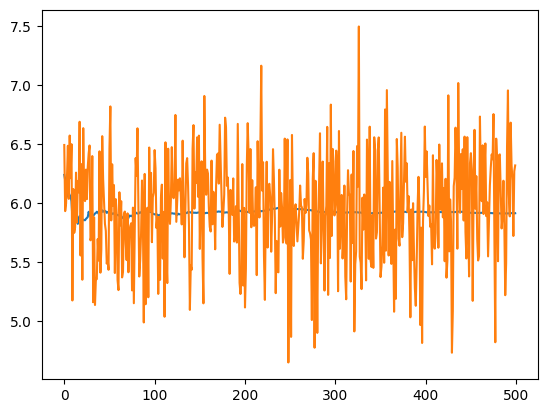

In [315]:
M = medias(p)
B = radio_promedio(500,M,s_g,p)[0]
B1 = radio_promedio(500,M,s_g,p)[1]
print(np.mean(B))
plt.plot(B)
plt.plot(B1)
plt.show()

Se puede apreciar que se estabiliza en 300 iteraciones

In [316]:
print('x_p =',np.mean(B))
print('s_p =',np.std(B))

x_p = 5.923865463108824
s_p = 0.03269280972337165


**Paso 6.** Repita el experimento n veces



In [317]:
def modelo(n,M,s_g,p):
  l1 = []

  for x in range(n):
    R_prom = radio_promedio(300,M,s_g,p)
    l1.append(np.mean(R_prom))

  return(l1)

In [318]:
Y_1 = modelo(150,M,s_g,p)

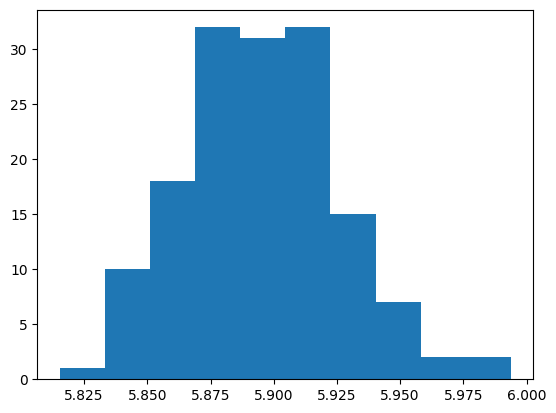

In [319]:
plt.hist(Y_1)
plt.show()

El radio promedio de purificacion es de

In [320]:
y_m = np.mean(Y_1)
print(y_m)

5.895562376860797


con una desviacion estandar

In [321]:
s_m = np.std(Y_1)
print(s_m)

0.030411179288257865


**Paso 7**. Hallar el intervalo de confianza para la media
\begin{equation*}
  \bar{x} - Z_{\frac{\alpha}{2}} \cdot \frac{s}{\sqrt{n}} < \mu < \bar{x} + Z_{\frac{\alpha}{2}} \cdot \frac{s}{\sqrt{n}}
\end{equation*}

Intervalo de confianza para el radio promedio del experimetno

In [322]:
print(y_m - 1.96*(s_m/np.sqrt(300)), y_m + 1.96*s_m/np.sqrt(300))

5.8921210279613 5.899003725760293


Por tanto, el radio promedio para el modelo es de

In [323]:
print('p =',y_m)

p = 5.895562376860797


###Algoritmo Recursivo

In [324]:
def radio_g(M,s_g,p):
  P = np.abs(rd.gauss(M[0],s_g))
  T = rd.gauss(M[1],5)
  t = rd.gauss(M[2],1)
  R = p[0] + p[1]*P + p[2]*T + p[4]*t + p[3]*P*T + p[5]*P*t + p[6]*T*t + p[7]*P*T*t
  return(R,P,T,t)

In [325]:
r1=[]
r2=[]
M = medias(p)

for x in range(15):
  for i in range(10):
    R,P,T,t = radio_g(M,s_g,p)
    r1.append(R)
    r2.append([P,T,t])

  I = r1.index(max(r1))
  M = r2[I][0],r2[I][1],r2[I][2]

  #print(I)
  print(r1[I], M)
  #print(r1[I],M)

5.455686175231485 (0.0020120395570380686, 192.00533321464923, 12.67249649614148)
5.521466544655668 (0.00028423613388233707, 189.48649312747202, 12.173204851656934)
5.521466544655668 (0.00028423613388233707, 189.48649312747202, 12.173204851656934)
5.521466544655668 (0.00028423613388233707, 189.48649312747202, 12.173204851656934)
5.542395682757724 (0.0020221013806650916, 195.29207784696493, 11.528073952074974)
5.542395682757724 (0.0020221013806650916, 195.29207784696493, 11.528073952074974)
5.542395682757724 (0.0020221013806650916, 195.29207784696493, 11.528073952074974)
5.741162996004639 (0.0008222712489859953, 200.61670378203496, 10.50805707050405)
5.741162996004639 (0.0008222712489859953, 200.61670378203496, 10.50805707050405)
5.741162996004639 (0.0008222712489859953, 200.61670378203496, 10.50805707050405)
5.741162996004639 (0.0008222712489859953, 200.61670378203496, 10.50805707050405)
5.741162996004639 (0.0008222712489859953, 200.61670378203496, 10.50805707050405)
5.741162996004639 (